## New York Data

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [6]:
NY_neighborhoods_data = newyork_data['features']

In [7]:
NY_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [8]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']

NY_neighborhoods = pd.DataFrame(columns = column_names)

In [9]:
NY_neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [13]:
for data in NY_neighborhoods_data:
    borough = data['properties']['borough']
    neighborhood_name = data['properties']['name']
    
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NY_neighborhoods = NY_neighborhoods.append({'Borough': borough, 'Neighborhood': neighborhood_name, 'Latitude': neighborhood_lat, 'Longitude': neighborhood_lon}, ignore_index=True)

In [61]:
NY_neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [17]:
print('The Dataframe has {} boroughs and {} neighborhoods.'.format(
        len(NY_neighborhoods['Borough'].unique()),
        NY_neighborhoods.shape[0]))

The Dataframe has 5 boroughs and 306 neighborhoods.


In [18]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent = 'ny_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of New York City are {} {}.'.format(latitude, longitude))

The geographical coordinate of New York City are 40.7127281 -74.0060152.


In [19]:
map_newyork = folium.Map(location = [latitude, longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip(NY_neighborhoods['Latitude'], NY_neighborhoods['Longitude'], NY_neighborhoods['Borough'], NY_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_newyork)

map_newyork

In [20]:
CLIENT_ID = 'ZL0RHWZXHZMSSZV21UG0554KNVUGX0GOEM55SSK4LCDN42IF' # your Foursquare ID
CLIENT_SECRET = 'EZZKAHSGLKN1W05BGJYZD51Z33ZE5PHQVSJVH4OSP14SYKJV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZL0RHWZXHZMSSZV21UG0554KNVUGX0GOEM55SSK4LCDN42IF
CLIENT_SECRET:EZZKAHSGLKN1W05BGJYZD51Z33ZE5PHQVSJVH4OSP14SYKJV


In [21]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
NY_venues = getNearbyVenues(names = NY_neighborhoods['Neighborhood'], latitudes = NY_neighborhoods['Latitude'], longitudes = NY_neighborhoods['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [23]:
print(NY_venues.shape)
NY_venues.head()

(10212, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3         Walgreens       40.896528       -73.844700        Pharmacy  
4           Dunkin'       40.890459       -73.849089      Donut Shop

In [24]:
NY_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      28                      28   
Annadale                                      10                      10   
Arden Heights                                  5                       5   
Arlington                                      6                       6   
Arrochar                                      21                      21   
Arverne                                       18                      18   
Astoria                                      100                     100   
Astoria Heights                               11                      11   
Auburndale                                    18                      18   
Bath Beach                                    49                      49   
Battery Park City                             86                      86   
Bay Ridge                                     85                      85   
Bay Terrace                                   46                      46   
Baychester                                    21                      21   
Bayside                                       75                      75   
Bayswater                                      2                       2   
Bedford Park                                  32                      32   
Bedford Stuyvesant                            27                      27   
Beechhurst                                    14                      14   
Bellaire                                      14                      14   
Belle Harbor                                  16                      16   
Bellerose                                     21                      21   
Belmont                                       98                      98   
Bensonhurst                                   31                      31   
Bergen Beach                                   6                       6   
Blissville                                    18                      18   
Bloomfield                                     6                       6   
Boerum Hill                                   95                      95   
Borough Park                                  21                      21   
Breezy Point                                   4                       4   
Briarwood                                      8                       8   
Brighton Beach                                45                      45   
Broad Channel                                  5                       5   
Broadway Junction                             19                      19   
Bronxdale                                     12                      12   
Brooklyn Heights                             100                     100   
Brookville                                     1                       1   
Brownsville                                   19                      19   
Bulls Head                                    45                      45   
Bushwick                                      72                      72   
Butler Manor                                   5                       5   
Cambria Heights                               13                      13   
Canarsie                                       5                       5   
Carnegie Hill                                100                     100   
Carroll Gardens                              100                     100   
Castle Hill                                    6                       6   
Castleton Corners                             15                      15   
Central Harlem                                44                      44   
Charleston                                    30                      30   
Chelsea                                      105                     105   
Chinatown                                    100                     100   

In [25]:
print('There are {} unique categories.'.format(len(NY_venues['Venue Category'].unique())))

There are 435 unique categories.


In [26]:
NY_onehot = pd.get_dummies(NY_venues[['Venue Category']], prefix = "", prefix_sep = "")

NY_onehot['Neighborhood'] = NY_venues['Neighborhood']

col_list = list(NY_onehot.columns)
col_list.remove('Neighborhood')
cols = ['Neighborhood'] + [col for col in col_list]

NY_onehot = NY_onehot[cols]

NY_onehot.head()

Neighborhood  Accessories Store  Acupuncturist  Adult Boutique  \
0    Wakefield                  0              0               0   
1    Wakefield                  0              0               0   
2    Wakefield                  0              0               0   
3    Wakefield                  0              0               0   
4    Wakefield                  0              0               0   

   Afghan Restaurant  African Restaurant  Airport Terminal  \
0                  0                   0                 0   
1                  0                   0                 0   
2                  0                   0                 0   
3                  0                   0                 0   
4                  0                   0                 0   

   American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
0                    0             0       0                 0   
1                    0             0       0                 0   
2                    0             0       0                 0   
3                    0             0       0                 0   
4                    0             0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  Auditorium  \
0                     0                 0                   0           0   
1                     0                 0                   0           0   
2                     0                 0                   0           0   
3                     0                 0                   0           0   
4                     0                 0                   0           0   

   Australian Restaurant  Austrian Restaurant  Auto Garage  Auto Workshop  \
0                      0                    0            0              0   
1                      0                    0            0              0   
2                      0                    0            0              0   
3                      0                    0            0              0   
4                      0                    0            0              0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0                0          0           0           0       0     0    0   
1                0          0           0           0       0     0    0   
2                0          0           0           0       0     0    0   
3                0          0           0           0       0     0    0   
4                0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Bath House  Beach  \
0               0                 0                 0           0      0   
1               0                 0                 0           0      0   
2               0                 0                 0           0      0   
3               0                 0                 0           0      0   
4               0                 0                 0           0      0   

   Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0          0                0         0            0           0   
1          0                0         0            0           0   
2          0                0         0            0           0   
3          0                0         0            0           0   
4          0                0         0            0           0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0              0                         0    

In [28]:
NY_onehot.shape

(10212, 435)

In [29]:
NY_grouped = NY_onehot.groupby('Neighborhood').mean().reset_index()
NY_grouped

Neighborhood  Accessories Store  Acupuncturist  \
0                     Allerton           0.000000           0.00   
1                     Annadale           0.000000           0.00   
2                Arden Heights           0.000000           0.00   
3                    Arlington           0.000000           0.00   
4                     Arrochar           0.000000           0.00   
5                      Arverne           0.000000           0.00   
6                      Astoria           0.000000           0.00   
7              Astoria Heights           0.000000           0.00   
8                   Auburndale           0.000000           0.00   
9                   Bath Beach           0.000000           0.00   
10           Battery Park City           0.000000           0.00   
11                   Bay Ridge           0.000000           0.00   
12                 Bay Terrace           0.021739           0.00   
13                  Baychester           0.000000           0.00   
14                     Bayside           0.000000           0.00   
15                   Bayswater           0.000000           0.00   
16                Bedford Park           0.000000           0.00   
17          Bedford Stuyvesant           0.000000           0.00   
18                  Beechhurst           0.000000           0.00   
19                    Bellaire           0.000000           0.00   
20                Belle Harbor           0.000000           0.00   
21                   Bellerose           0.000000           0.00   
22                     Belmont           0.000000           0.00   
23                 Bensonhurst           0.000000           0.00   
24                Bergen Beach           0.000000           0.00   
25                  Blissville           0.000000           0.00   
26                  Bloomfield           0.000000           0.00   
27                 Boerum Hill           0.000000           0.00   
28                Borough Park           0.000000           0.00   
29                Breezy Point           0.000000           0.00   
30                   Briarwood           0.000000           0.00   
31              Brighton Beach           0.000000           0.00   
32               Broad Channel           0.000000           0.00   
33           Broadway Junction           0.000000           0.00   
34                   Bronxdale           0.000000           0.00   
35            Brooklyn Heights           0.000000           0.00   
36                  Brookville           0.000000           0.00   
37                 Brownsville           0.000000           0.00   
38                  Bulls Head           0.000000           0.00   
39                    Bushwick           0.000000           0.00   
40                Butler Manor           0.000000           0.00   
41             Cambria Heights           0.000000           0.00   
42                    Canarsie           0.000000           0.00   
43               Carnegie Hill           0.000000           0.00   
44             Carroll Gardens           0.000000           0.00   
45                 Castle Hill           0.000000           0.00   
46           Castleton Corners           0.000000           0.00   
47              Central Harlem           0.000000           0.00   
48                  Charleston           0.000000           0.00   
49                     Chelsea           0.000000           0.00   
50                   Chinatown           0.000000           0.00   
51                 City Island           0.000000           0.00   
52                   City Line           0.000000           0.00   
53                Civic Center           0.000000           0.00   
54           Claremont Village           0.000000           0.00   
55                Clason Point           0.000000           0.00   
56                     Clifton           0.000000           0.00   
57                     Clinton           0.000000           0.00   
58    

In [30]:
NY_grouped.shape

(300, 435)

## Toronto Data

In [33]:
from bs4 import BeautifulSoup

In [35]:
wiki_url = "https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050."

req = requests.get(wiki_url)
soup = BeautifulSoup(req.content, 'lxml')
table_classes = {"class": ["sortable", "plainrowheaders"]}
wikitables = soup.findAll("table", table_classes)
wikitables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Postcode</th>
 <th>Borough</th>
 <th>Neighbourhood
 </th></tr>
 <tr>
 <td>M1A</td>
 <td>Not assigned</td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M2A</td>
 <td>Not assigned</td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M3A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
 </td></tr>
 <tr>
 <td>M4A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
 </td></tr>
 <tr>
 <td>M5A</td>
 <td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
 <td><a href="/wiki/Regent_Park" title="Regent Park">Harbourfront</a>
 </td></tr>
 <tr>
 <td>M6A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Lawrence_Heights" title="Lawrence Heights">Lawrence Heights</a>
 </td></tr>
 <tr>


In [36]:
for table in wikitables:
    ths = table.find_all('th')
    headings = [th.text.strip() for th in ths]
    if headings[:3] == ['Postcode', 'Borough', "Neighbourhood"]:
        break
with open('list_of_postal_codes_of_canada.txt', 'w') as fo:
    for tr in table.find_all('tr'):
        tds = tr.find_all('td')
        if not tds:
            continue
        PostalCode, Borough, Neighborhood = [td.text.strip() for td in tds[:3]]
        
        print('; '.join([PostalCode, Borough, Neighborhood]), file=fo)

In [37]:
df = pd.read_csv('list_of_postal_codes_of_canada.txt', sep = ';', header = None, names = ['PostalCode', 'Borough', 'Neighborhood'])
df.head()

PostalCode            Borough       Neighborhood
0        M1A       Not assigned       Not assigned
1        M2A       Not assigned       Not assigned
2        M3A         North York          Parkwoods
3        M4A         North York   Victoria Village
4        M5A   Downtown Toronto       Harbourfront

In [39]:
import re
booleans = []

for result in df.Borough:
    if not re.search('Not assigned', result):
        booleans.append(True)
    else:
        booleans.append(False)
print(booleans[0:5])
print(len(booleans))

Filtered = pd.Series(booleans)

can_data = df[Filtered].reset_index(drop = True)

can_data.head(5)

[False, False, True, True, True]
287


PostalCode            Borough       Neighborhood
0        M3A         North York          Parkwoods
1        M4A         North York   Victoria Village
2        M5A   Downtown Toronto       Harbourfront
3        M6A         North York   Lawrence Heights
4        M6A         North York     Lawrence Manor

In [40]:
new_cd = can_data.astype(str).groupby('PostalCode')['Neighborhood'].agg(','.join).reset_index()
merged_cd = pd.merge(can_data, new_cd, on = ['PostalCode'], how = 'inner')
duplicate_cd = merged_cd.drop(['Neighborhood_x'], axis = 1)
final_cd = duplicate_cd.drop_duplicates(subset='PostalCode')
final_cd.columns = ['PostalCode', 'Borough', 'Neighborhood']
final_cd = final_cd.reset_index(drop = True)

In [41]:
boolean = []
for result in final_cd.Neighborhood:
    if not re.search('Not assigned', result):
        boolean.append(True)
    else:
        boolean.append(False)



Filter = pd.Series(boolean)

X = final_cd['Neighborhood'].where(boolean, np.nan)
X = pd.Series(X)
final_cd = final_cd.drop(['Neighborhood'], axis = 1)

final_cd['Neighborhood'] = X.values

In [42]:
final_cd["Neighborhood"] = final_cd["Neighborhood"].fillna(final_cd["Borough"])
final_cd.head()

PostalCode            Borough                       Neighborhood
0        M3A         North York                          Parkwoods
1        M4A         North York                   Victoria Village
2        M5A   Downtown Toronto                       Harbourfront
3        M6A         North York   Lawrence Heights, Lawrence Manor
4        M7A   Downtown Toronto                       Queen's Park

In [43]:
final_cd.shape

(103, 3)

In [44]:
path = "http://cocl.us/Geospatial_data"

ll_df = pd.read_csv(path)
ll_df.columns = ['PostalCode', 'Latitude', 'Longitude']
ll_df.head()

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

In [60]:
toronto_data = pd.merge(final_cd, ll_df, on = ['PostalCode'], how = 'inner')
toronto_data.head()

PostalCode            Borough                       Neighborhood   Latitude  \
0        M3A         North York                          Parkwoods  43.753259   
1        M4A         North York                   Victoria Village  43.725882   
2        M5A   Downtown Toronto                       Harbourfront  43.654260   
3        M6A         North York   Lawrence Heights, Lawrence Manor  43.718518   
4        M7A   Downtown Toronto                       Queen's Park  43.662301   

   Longitude  
0 -79.329656  
1 -79.315572  
2 -79.360636  
3 -79.464763  
4 -79.389494

In [46]:
address = 'Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6534817, -79.3839347.


In [47]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [49]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

 Parkwoods
 Victoria Village
 Harbourfront
 Lawrence Heights, Lawrence Manor
 Queen's Park
 Islington Avenue
 Rouge, Malvern
 Don Mills North
 Woodbine Gardens, Parkview Hill
 Ryerson, Garden District
 Glencairn
 Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
 Highland Creek, Rouge Hill, Port Union
 Flemingdon Park, Don Mills South
 Woodbine Heights
 St. James Town
 Humewood-Cedarvale
 Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
 Guildwood, Morningside, West Hill
 The Beaches
 Berczy Park
 Caledonia-Fairbanks
 Woburn
 Leaside
 Central Bay Street
 Christie
 Cedarbrae
 Hillcrest Village
 Bathurst Manor, Downsview North, Wilson Heights
 Thorncliffe Park
 Adelaide, King, Richmond
 Dovercourt Village, Dufferin
 Scarborough Village
 Fairview, Henry Farm, Oriole
 Northwood Park, York University
 East Toronto
 Harbourfront East, Toronto Islands, Union Station
 Little Portugal, Trinity
 East Birchmount Park, Ionview, Kennedy Park
 Bayview Village
 CFB T

In [50]:
print(toronto_venues.shape)
toronto_venues.head()

(2197, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0          Parkwoods              43.753259              -79.329656   
1          Parkwoods              43.753259              -79.329656   
2          Parkwoods              43.753259              -79.329656   
3   Victoria Village              43.725882              -79.315572   
4   Victoria Village              43.725882              -79.315572   

                    Venue  Venue Latitude  Venue Longitude     Venue Category  
0         Brookbanks Park       43.751976       -79.332140               Park  
1         GTA Restoration       43.753396       -79.333477    Fireworks Store  
2           Variety Store       43.751974       -79.333114  Food & Drink Shop  
3  Victoria Village Arena       43.723481       -79.315635       Hockey Arena  
4             Tim Hortons       43.725517       -79.313103        Coffee Shop

In [51]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
 Adelaide, King, Richmond                                             100   
 Agincourt                                                              4   
 Agincourt North, L'Amoreaux East, Milliken, St...                      2   
 Albion Gardens, Beaumond Heights, Humbergate, ...                     12   
 Alderwood, Long Branch                                                 9   
 Bathurst Manor, Downsview North, Wilson Heights                       19   
 Bayview Village                                                        4   
 Bedford Park, Lawrence Manor East                                     25   
 Berczy Park                                                           55   
 Birch Cliff, Cliffside West                                            4   
 Bloordale Gardens, Eringate, Markland Wood, Ol...                      7   
 Brockton, Exhibition Place, Parkdale Village                          23   
 Business Reply Mail Processing Centre 969 Eastern                     16   
 CFB Toronto, Downsview East                                            2   
 CN Tower, Bathurst Quay, Island airport, Harbo...                     17   
 Cabbagetown, St. James Town                                           43   
 Caledonia-Fairbanks                                                    4   
 Canada Post Gateway Processing Centre                                 12   
 Cedarbrae                                                              8   
 Central Bay Street                                                    76   
 Chinatown, Grange Park, Kensington Market                             75   
 Christie                                                              18   
 Church and Wellesley                                                  81   
 Clairlea, Golden Mile, Oakridge                                        9   
 Clarks Corners, Sullivan, Tam O'Shanter                               13   
 Cliffcrest, Cliffside, Scarborough Village West                        2   
 Commerce Court, Victoria Hotel                                       100   
 Davisville                                                            35   
 Davisville North                                                       9   
 Deer Park, Forest Hill SE, Rathnelly, South Hi...                     15   
 Del Ray, Keelesdale, Mount Dennis, Silverthorn                         4   
 Design Exchange, Toronto Dominion Centre                             100   
 Don Mills North                                                        4   
 Dorset Park, Scarborough Town Centre, Wexford ...                      6   
 Dovercourt Village, Dufferin                                          18   
 Downsview Central                                                      3   
 Downsview Northwest                                                    5   
 Downsview West                                                         6   
 Downsview, North Park, Upwood Park                                     4   
 East Birchmount Park, Ionview, Kennedy Park                            4   
 East Toronto                                                           3   
 Emery, Humberlea                                                       1   
 Fairview, Henry Farm, Oriole                                          70   
 First Canadian Place, Underground city                               100   
 Flemingdon Park, Don Mills South                                      20   
 Forest Hill North, Forest Hill West                                    4   
 Glencairn                                                              4   
 Guildwood, Morningside, West Hill                                      7   
 Harbord, University of Toronto                                        36   
 Harbourfront                                                          45   
 Harbourfront East, Toronto Islands, Union Stati

In [52]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 271 uniques categories.


In [53]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

col_list = list(toronto_onehot.columns)
col_list.remove('Neighborhood')
cols = ['Neighborhood'] + [col for col in col_list]

toronto_onehot = toronto_onehot[cols]
toronto_onehot.head()

Neighborhood  Accessories Store  Afghan Restaurant  Airport  \
0          Parkwoods                  0                  0        0   
1          Parkwoods                  0                  0        0   
2          Parkwoods                  0                  0        0   
3   Victoria Village                  0                  0        0   
4   Victoria Village                  0                  0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0                    0                 0                   0              0   
1                    0                 0                   0              0   
2                    0                 0                   0              0   
3                    0                 0                   0              0   
4                    0                 0                   0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    0               0   
2          0           0           0       0     0    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Beach  \
0                 0                 0                   0      0   
1                 0                 0                   0      0   
2                 0                 0                   0      0   
3                 0                 0                   0      0   
4                 0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
0                0         0           0                   0          0   
1                0         0           0                   0          0   
2                0         0           0                   0          0   
3                0         0           0                   0          0   
4                0         0           0                   0          0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0       0           0              0          0         0   
1       0           0              0          0         0   
2       0           0              0          0         0   
3       0           0              0          0         0   
4       0           0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0                0         0             0    

In [54]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

Neighborhood  Accessories Store  \
0                           Adelaide, King, Richmond                0.0   
1                                          Agincourt                0.0   
2   Agincourt North, L'Amoreaux East, Milliken, S...                0.0   
3   Albion Gardens, Beaumond Heights, Humbergate,...                0.0   
4                             Alderwood, Long Branch                0.0   

   Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0                0.0      0.0                 0.0           0.0   
1                0.0      0.0                 0.0           0.0   
2                0.0      0.0                 0.0           0.0   
3                0.0      0.0                 0.0           0.0   
4                0.0      0.0                 0.0           0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0                 0.02   
1             0.0              0.0               0.0                 0.00   
2             0.0              0.0               0.0                 0.00   
3             0.0              0.0               0.0                 0.00   
4             0.0              0.0               0.0                 0.00   

   Antique Shop  Aquarium  Art Gallery  Arts & Crafts Store  Asian Restaurant  \
0           0.0       0.0         0.01                  0.0              0.02   
1           0.0       0.0         0.00                  0.0              0.00   
2           0.0       0.0         0.00                  0.0              0.00   
3           0.0       0.0         0.00                  0.0              0.00   
4           0.0       0.0         0.00                  0.0              0.00   

   Athletics & Sports  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  \
0                 0.0            0.0        0.0         0.0         0.0   
1                 0.0            0.0        0.0         0.0         0.0   
2                 0.0            0.0        0.0         0.0         0.0   
3                 0.0            0.0        0.0         0.0         0.0   
4                 0.0            0.0        0.0         0.0         0.0   

   Bakery  Bank   Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0    0.03   0.0  0.03             0.0               0.0               0.0   
1    0.00   0.0  0.00             0.0               0.0               0.0   
2    0.00   0.0  0.00             0.0               0.0               0.0   
3    0.00   0.0  0.00             0.0               0.0               0.0   
4    0.00   0.0  0.00             0.0               0.0               0.0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0                 0.0    0.0              0.0       0.0    0.000000   
1                 0.0    0.0              0.0       0.0    0.000000   
2                 0.0    0.0              0.0       0.0    0.000000   
3                 0.0    0.0              0.0       0.0    0.083333   
4                 0.0    0.0              0.0       0.0    0.000000   

   Belgian Restaurant  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
0                 0.0        0.0     0.0         0.0            0.0   
1                 0.0        0.0     0.0         0.0            0.0   
2                 0.0        0.0     0.0         0.0            0.0   
3                 0.0        0.0     0.0         0.0            0.0   
4                 0.0        0.0     0.0         0.0            0.0   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
0       0.02       0.0                  0.01            0.02      0.0   
1       0.00       0.0                  0.00            0.25      0.0   
2       0.00       0.0                  0.00            0.00      0.0   
3       0.00       0.0                  0.00            0.00      0.0   
4       0.00       0.0                  0.00            0.00      0.0   

   Bridal Shop  Bubble Tea Sh

In [55]:
toronto_grouped.shape

(99, 271)

## Comparing New York and Toronto

In [63]:

L1 = list(NY_grouped.columns)
L2 = list(toronto_grouped.columns)
L=list(set(L1).intersection(L2))

df=pd.merge(NY_grouped,toronto_grouped, on=L,how='outer')
cols = [col for col in df.columns if col not in L]
df=df.drop(cols,axis=1)
df.head()

Neighborhood  Accessories Store  Afghan Restaurant  Airport Terminal  \
0       Allerton                0.0                0.0               0.0   
1       Annadale                0.0                0.0               0.0   
2  Arden Heights                0.0                0.0               0.0   
3      Arlington                0.0                0.0               0.0   
4       Arrochar                0.0                0.0               0.0   

   American Restaurant  Antique Shop  Art Gallery  Arts & Crafts Store  \
0             0.000000           0.0          0.0                  0.0   
1             0.100000           0.0          0.0                  0.0   
2             0.000000           0.0          0.0                  0.0   
3             0.166667           0.0          0.0                  0.0   
4             0.000000           0.0          0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  Baby Store  \
0               0.0            0.000000            0.0        0.0         0.0   
1               0.0            0.000000            0.0        0.0         0.0   
2               0.0            0.000000            0.0        0.0         0.0   
3               0.0            0.000000            0.0        0.0         0.0   
4               0.0            0.047619            0.0        0.0         0.0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0    0.000000     0.0   0.0  0.0             0.0               0.0   
1    0.000000     0.0   0.0  0.0             0.0               0.0   
2    0.000000     0.0   0.0  0.0             0.0               0.0   
3    0.000000     0.0   0.0  0.0             0.0               0.0   
4    0.047619     0.0   0.0  0.0             0.0               0.0   

   Basketball Court  Beach  Bed & Breakfast  Beer Bar  Beer Store  Bike Shop  \
0               0.0    0.0              0.0       0.0         0.0        0.0   
1               0.0    0.0              0.0       0.0         0.0        0.0   
2               0.0    0.0              0.0       0.0         0.0        0.0   
3               0.0    0.0              0.0       0.0         0.0        0.0   
4               0.0    0.0              0.0       0.0         0.0        0.0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0     0.0         0.0       0.000000        0.0       0.0   
1     0.0         0.0       0.000000        0.0       0.0   
2     0.0         0.0       0.000000        0.0       0.0   
3     0.0         0.0       0.166667        0.0       0.0   
4     0.0         0.0       0.000000        0.0       0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                   0.0        0.035714      0.0          0.0   
1                   0.0        0.000000      0.0          0.0   
2                   0.0        0.000000      0.0          0.0   
3                   0.0        0.000000      0.0          0.0   
4                   0.0        0.000000      0.0          0.0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0              0.0       0.0           0.0            0.0       0.0   
1              0.0       0.0           0.0            0.0       0.0   
2              0.0       0.0           0.0            0.0       0.0   
3              0.0       0.0           0.0            0.0       0.0   
4              0.0       0.0           0.0            0.0       0.0   

   Bus Station  Butcher  Café  Cajun / Creole Restaurant  Camera Store  \
0     0.035714      0.0   0.0                        0.0           0.0   
1     0.000000      0.0   0.0                        0.0           0.0   
2     0.000000      0.0   0.0                        0.0           0.0   
3     0.000000      0.0   0.0                        0.0           0.0   
4     0.000000      0.0   0.0                        0.0           0.0   

   Candy Store  Caribbean Restaurant  Cheese Shop  Chinese Restaurant  \
0         

In [66]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'cumulative explained variance')

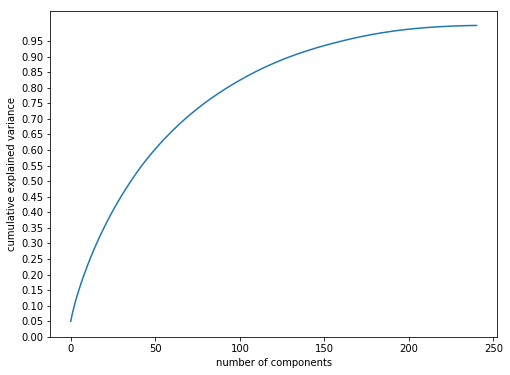

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

neigh_name = df['Neighborhood']
df_grouped_clustering = df.drop('Neighborhood', 1)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df_grouped_clustering)

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [68]:
pca = PCA(n_components=175)
dataset = pca.fit_transform(data_rescaled)

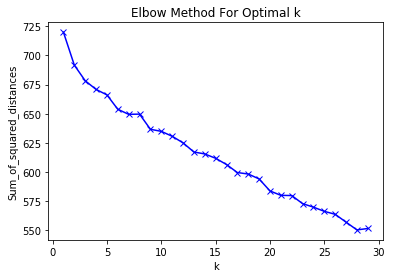

In [69]:
Sum_of_squared_distances = []
K = range(1, 30)
for kclusters in K:
    km = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state=10).fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

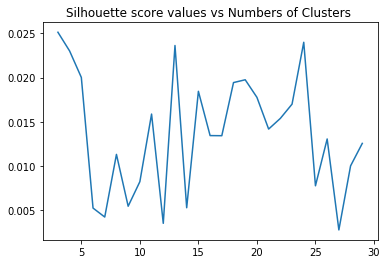

Optimal number of components is:
3


In [71]:
import sklearn

obs = dataset.copy()
silhouette_score_values=list()
 
NumberOfClusters=range(3,30)
 
for i in NumberOfClusters:
    
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=10)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', random_state=0))
    
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [73]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df['Neighborhood']

for ind in np.arange(df.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place           Supermarket   
1       Annadale            Sports Bar                 Diner   
2  Arden Heights              Pharmacy           Coffee Shop   
3      Arlington          Intersection   American Restaurant   
4       Arrochar           Pizza Place         Deli / Bodega   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0         Deli / Bodega    Chinese Restaurant              Pharmacy  
1              Pharmacy   American Restaurant            Restaurant  
2           Pizza Place   Rental Car Location         Deli / Bodega  
3         Boat or Ferry         Grocery Store         Deli / Bodega  
4    Italian Restaurant              Pharmacy            Bagel Shop

In [74]:
df_grouped_clustering = dataset.copy()
df_grouped_clustering

array([[-3.05706401e-01,  8.77730698e-02,  1.72644189e-01, ...,
         2.02933586e-02, -3.51648591e-03, -1.07275173e-03],
       [-2.51839606e-01,  4.02436243e-02,  1.47100220e-02, ...,
         1.51186277e-02, -3.48673582e-02, -3.85100249e-02],
       [-3.24359503e-01,  1.75369430e-01,  1.07709327e-01, ...,
         4.41514095e-03,  2.25146494e-03, -3.18575867e-04],
       ...,
       [-1.45004019e-01, -5.20634865e-02,  1.45419577e-01, ...,
         3.05072581e-02, -2.33167810e-02, -3.37163759e-02],
       [-2.61879503e-01, -8.69429413e-02,  1.11507208e-01, ...,
        -7.22966276e-02,  3.68955664e-02, -3.17069094e-02],
       [-1.92951782e-01, -1.79810801e-01,  2.35112706e-02, ...,
         2.56331595e-02, -2.91684817e-02, -4.63264085e-02]])

In [75]:
kclusters = 5
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2, copy_x=True).fit(df_grouped_clustering)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [76]:
df_grouped_with_cluster = df.copy()
df_grouped_with_cluster.insert(0, 'Cluster_Labels', kmeans.labels_)

In [77]:
df_grouped_with_cluster.head()

Cluster_Labels   Neighborhood  Accessories Store  Afghan Restaurant  \
0               1       Allerton                0.0                0.0   
1               2       Annadale                0.0                0.0   
2               2  Arden Heights                0.0                0.0   
3               3      Arlington                0.0                0.0   
4               3       Arrochar                0.0                0.0   

   Airport Terminal  American Restaurant  Antique Shop  Art Gallery  \
0               0.0             0.000000           0.0          0.0   
1               0.0             0.100000           0.0          0.0   
2               0.0             0.000000           0.0          0.0   
3               0.0             0.166667           0.0          0.0   
4               0.0             0.000000           0.0          0.0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0                  0.0               0.0            0.000000            0.0   
1                  0.0               0.0            0.000000            0.0   
2                  0.0               0.0            0.000000            0.0   
3                  0.0               0.0            0.000000            0.0   
4                  0.0               0.0            0.047619            0.0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0        0.0         0.0    0.000000     0.0   0.0  0.0             0.0   
1        0.0         0.0    0.000000     0.0   0.0  0.0             0.0   
2        0.0         0.0    0.000000     0.0   0.0  0.0             0.0   
3        0.0         0.0    0.000000     0.0   0.0  0.0             0.0   
4        0.0         0.0    0.047619     0.0   0.0  0.0             0.0   

   Baseball Stadium  Basketball Court  Beach  Bed & Breakfast  Beer Bar  \
0               0.0               0.0    0.0              0.0       0.0   
1               0.0               0.0    0.0              0.0       0.0   
2               0.0               0.0    0.0              0.0       0.0   
3               0.0               0.0    0.0              0.0       0.0   
4               0.0               0.0    0.0              0.0       0.0   

   Beer Store  Bike Shop  Bistro  Board Shop  Boat or Ferry  Bookstore  \
0         0.0        0.0     0.0         0.0       0.000000        0.0   
1         0.0        0.0     0.0         0.0       0.000000        0.0   
2         0.0        0.0     0.0         0.0       0.000000        0.0   
3         0.0        0.0     0.0         0.0       0.166667        0.0   
4         0.0        0.0     0.0         0.0       0.000000        0.0   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0       0.0                   0.0        0.035714      0.0          0.0   
1       0.0                   0.0        0.000000      0.0          0.0   
2       0.0                   0.0        0.000000      0.0          0.0   
3       0.0                   0.0        0.000000      0.0          0.0   
4       0.0                   0.0        0.000000      0.0          0.0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0              0.0       0.0           0.0            0.0       0.0   
1              0.0       0.0           0.0            0.0       0.0   
2              0.0       0.0           0.0            0.0       0.0   
3              0.0       0.0           0.0            0.0       0.0   
4              0.0       0.0           0.0            0.0       0.0   

   Bus Station  Butcher  Café  Cajun / Creole Restaurant  Camera Store  \
0     0.035714      0.0   0.0                        0.0           0.0   
1     0.000000      0.0   0.0                        0.0           0.0   
2     0.000000      0.0   0.0                        0.0           0.0   
3     0.000000      0.0   0.0                        0.0           0.0   
4     0.000000      0.0   0.0                        0.0     

In [78]:
df_with_cluster_and_neighborhood = df_grouped_with_cluster[['Cluster_Labels', 'Neighborhood']]

In [81]:
NY_data_merged = NY_neighborhoods[['Neighborhood', 'Latitude', 'Longitude']]
NY_data_merged = NY_data_merged.merge(df_with_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')

In [82]:
NY_data_merged.dropna(inplace = True)
NY_data_merged.head()

Neighborhood   Latitude  Longitude  Cluster_Labels
0    Wakefield  40.894705 -73.847201             2.0
1   Co-op City  40.874294 -73.829939             3.0
2  Eastchester  40.887556 -73.827806             3.0
3    Fieldston  40.895437 -73.905643             3.0
4    Riverdale  40.890834 -73.912585             3.0

In [83]:
Toronto_data_merged = toronto_data[['Neighborhood', 'Latitude', 'Longitude']]
Toronto_data_merged = Toronto_data_merged.merge(df_with_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')

In [84]:
Toronto_data_merged.dropna(inplace = True)
Toronto_data_merged.shape

(99, 4)

In [90]:
address_NY = 'Manhattan, NY'

geolocator = Nominatim(user_agent="NY_explorer")
location = geolocator.geocode(address_NY)
latitude_NY = location.latitude
longitude_NY = location.longitude
print('The geograpical coordinates of New York, NY are {}, {}.'.format(latitude_NY, longitude_NY))

The geograpical coordinates of New York, NY are 40.7896239, -73.9598939.


In [86]:
map_NY_with_clusters = folium.Map(location=[latitude_NY, longitude_NY], zoom_start= 11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(NY_data_merged['Latitude'], NY_data_merged['Longitude'], NY_data_merged['Neighborhood'], NY_data_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_NY_with_clusters)
       
map_NY_with_clusters

In [89]:
address_can = 'East York, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address_can)
latitude_tor = location.latitude
longitude_tor = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude_tor, longitude_tor))

The geograpical coordinates of Toronto are 43.699971000000005, -79.33251996261595.


In [88]:
map_Toronto_with_clusters = folium.Map(location=[latitude_tor, longitude_tor], zoom_start= 11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_data_merged['Latitude'], Toronto_data_merged['Longitude'], Toronto_data_merged['Neighborhood'], Toronto_data_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_Toronto_with_clusters)
       
map_Toronto_with_clusters